# Tarea 3

In [9]:
from dotenv import load_dotenv
import os
import gc

from huggingface_hub import login
from datasets import load_dataset

In [10]:
load_dotenv()
login(os.getenv("HF_TOKEN"))

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [8]:
# Download Dataset
smm2_dataset = load_dataset(
    "TheGreatRambler/mm2_level",
    split="train",
    streaming=True
)
columns_to_remove = ['level_data', 'unk2', 'unk3', 'unk9', 'unk10', 'unk11', 'unk12']
smm2_dataset = smm2_dataset.remove_columns(columns_to_remove)
smm2_dataset = smm2_dataset.shuffle(seed=2017, buffer_size=10_000)
smm2_small_data = smm2_dataset.take(10_000) # 10,000 filas = 2.5 mb
smm2_small_data.to_csv(os.getenv("DATASET_STORE_FILE"))
# Remove Dataset from ram
del smm2_dataset
del smm2_small_data
gc.collect()

KeyboardInterrupt: 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [12]:
smm2_df = pd.read_csv(os.getenv("DATASET_STORE_FILE"))
smm2_df.head(5)

data_id                name  \
0  30239715  超時間ギリギリ！20秒スピードラン！   
1  30245825   big bowser battel   
2  30235608   corre mario corre   
3  30240986     Soy Ghost House   
4  30238938     スマッシュブラザーズスペシャル   

                                         description    uploaded     created  \
0                     特殊なテクニックはいりません！正確に速く駆け抜けてください！  1621061069  1621092960   
1                                                NaN  1621077412  1621080840   
2                                                NaN  1621051239  1621033080   
3  All the ghosts here are imitation ghosts but t...  1621064079  1620710520   
4                                               たたかう  1621059182  1620229080   

   gamestyle  theme  difficulty  tag1  tag2  ...  versus_matches  \
0          3      0           2     1     3  ...               0   
1          3      2           1    10    13  ...               0   
2          3      3           1     6    13  ...               0   
3          2      1           1     1    14  ...               0   
4          0      2           0    11    12  ...               2   

   coop_matches  likes  boos  unique_players_and_versus  weekly_likes  \
0             0      3     2                         38             0   
1             0      1     1                         24             0   
2             0      0     0                          4             0   
3             0      1     0                         21             0   
4             0     13     4                         86             1   

   weekly_plays          uploader_pid   first_completer_pid  \
0             0   5636835424868763774  11743132911099669469   
1             0  17457220586588068610   2032282477863147653   
2             0  16868799314012020008   5314119376859665570   
3             1    500016729074707780   2667010115145826865   
4             2  18291438729357042043  10647264932114174013   

      record_holder_pid  
0    258350532000122600  
1   2032282477863147653  
2   5314119376859665570  
3  12740155152597352753  
4   1246724215227813455  

[5 rows x 33 columns]

In [13]:
columns_to_drop = ['data_id', 'name', 'description', 'gamestyle', 'theme', 'tag1', 'tag2', 'clear_condition', 'clear_condition_magnitude', 'weekly_likes', 'weekly_plays', 'uploader_pid', 'first_completer_pid', 'record_holder_pid']
smm2_df_clean = smm2_df.drop(columns_to_drop, axis=1)
smm2_df_clean['unique_clear_rate'] = np.minimum(smm2_df_clean['clears'] / smm2_df_clean['unique_players_and_versus'], 1.0)
smm2_df_clean.head(5)

uploaded     created  difficulty  game_version  world_record  \
0  1621061069  1621092960           2             5         15283   
1  1621077412  1621080840           1             5         47217   
2  1621051239  1621033080           1             5         53933   
3  1621064079  1620710520           1             5        223387   
4  1621059182  1620229080           0             5         20533   

   upload_time  upload_attempts  num_comments  timer  autoscroll_speed  \
0        15266                1             0     20                 0   
1        62592                1             0    500                 0   
2        57333                1             0    200                 0   
3       198789                1             1    500                 0   
4        32690                3             2    300                 0   

   clears  attempts  clear_rate  plays  versus_matches  coop_matches  likes  \
0      23       396    5.808081     45               0             0      3   
1      16        59   27.118644     26               0             0      1   
2       1        12    8.333333      4               0             0      0   
3       6        59   10.169492     22               0             0      1   
4      84       160   52.500000     95               2             0     13   

   boos  unique_players_and_versus  unique_clear_rate  
0     2                         38           0.605263  
1     1                         24           0.666667  
2     0                          4           0.250000  
3     0                         21           0.285714  
4     4                         86           0.976744

In [14]:
smm2_df_clean.dtypes

uploaded                       int64
created                        int64
difficulty                     int64
game_version                   int64
world_record                   int64
upload_time                    int64
upload_attempts                int64
num_comments                   int64
timer                          int64
autoscroll_speed               int64
clears                         int64
attempts                       int64
clear_rate                   float64
plays                          int64
versus_matches                 int64
coop_matches                   int64
likes                          int64
boos                           int64
unique_players_and_versus      int64
unique_clear_rate            float64
dtype: object

## Mis datos son parametricos?

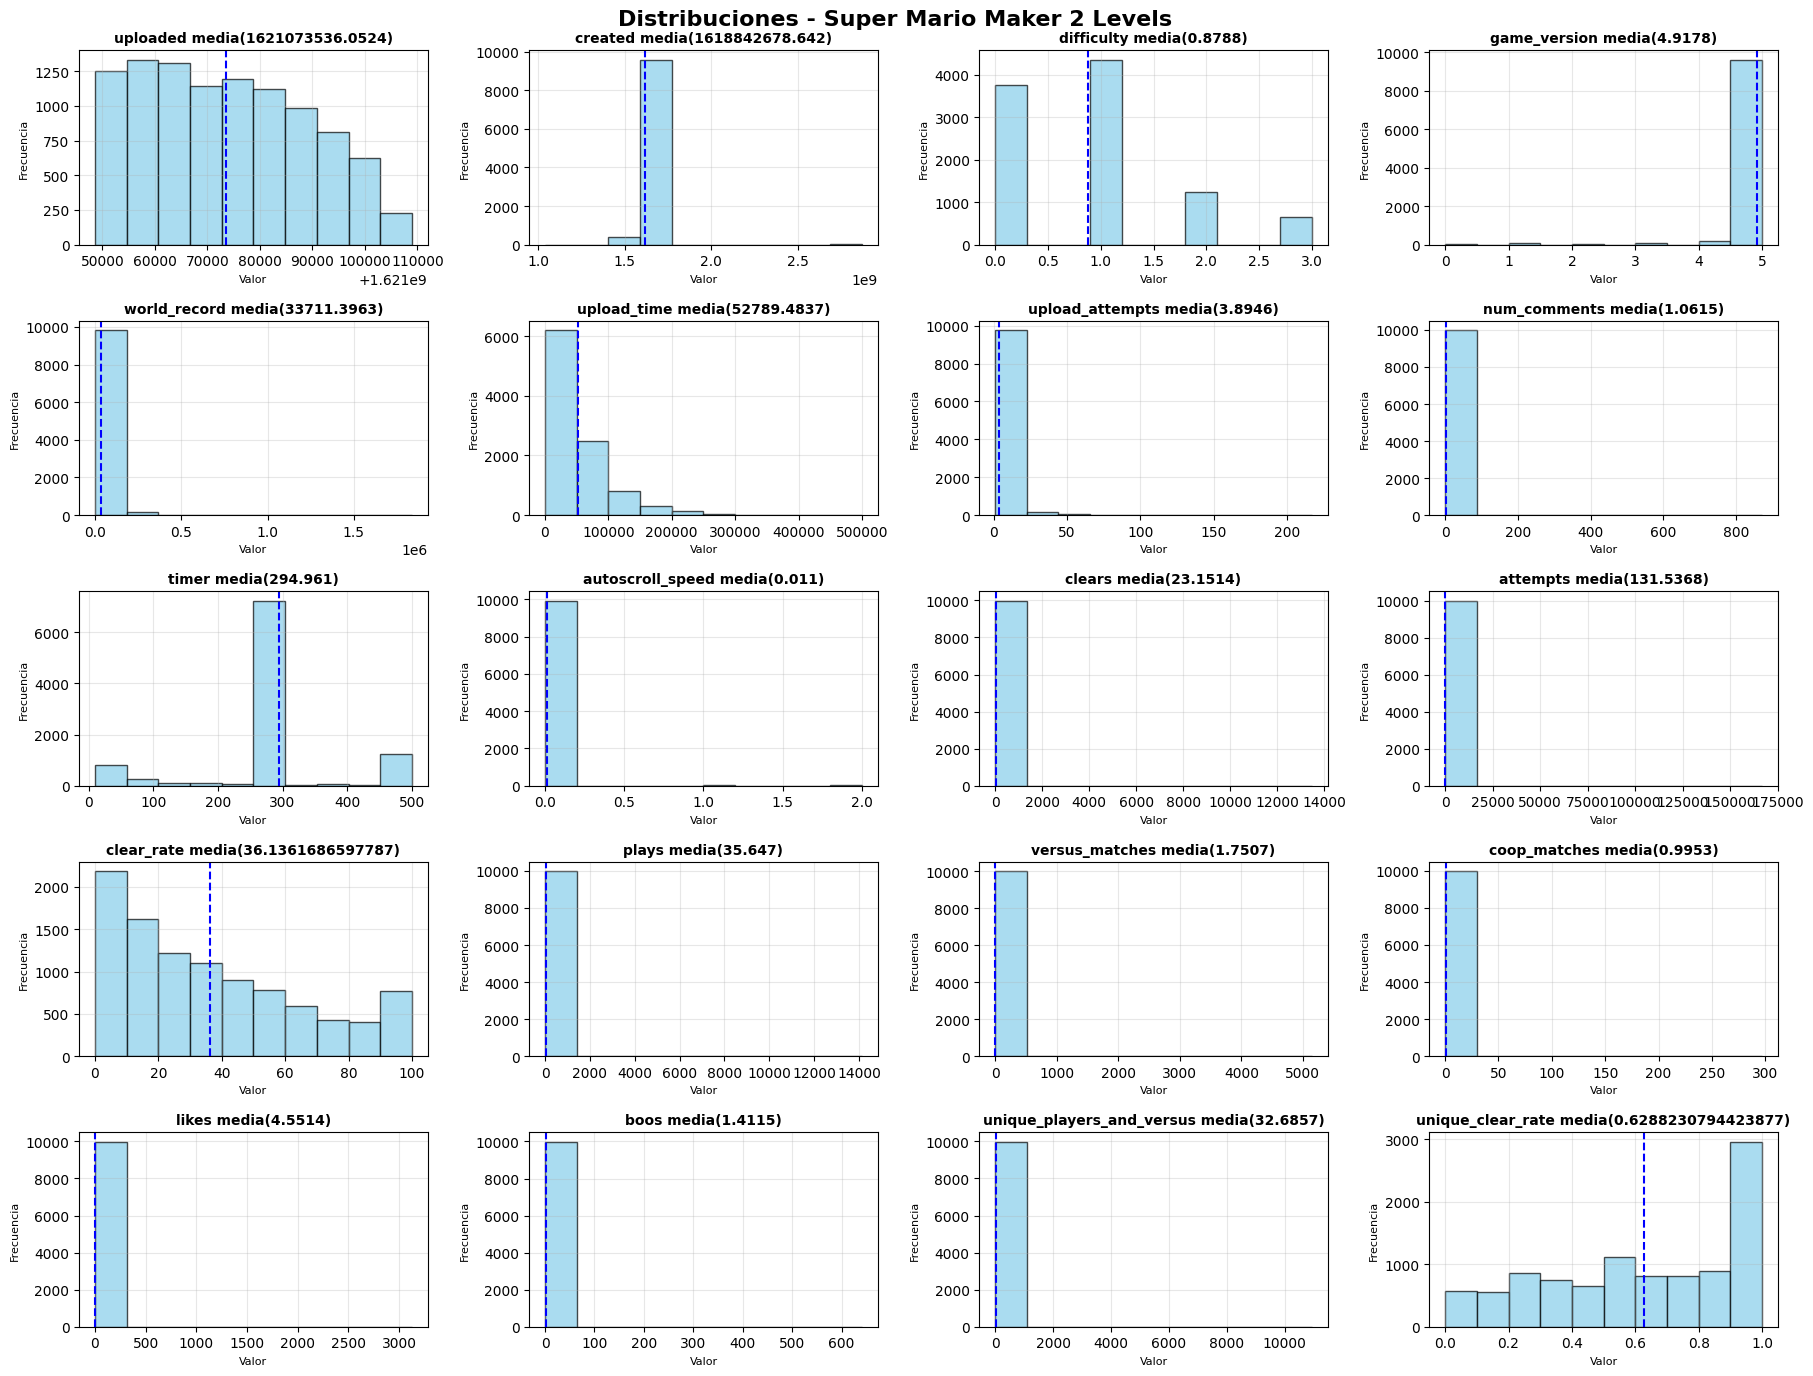

In [15]:
fig, axes = plt.subplots(5, 4, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(smm2_df_clean.columns):
    axes[i].hist(smm2_df_clean[col].dropna(), color='skyblue', edgecolor='black', alpha=0.7)
    mean_val = smm2_df_clean[col].mean()
    axes[i].axvline(x=mean_val, color='blue', linestyle='--')
    
    axes[i].set_title(f'{col} media({mean_val})', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Valor', fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].grid(True, alpha=0.3)
for j in range(i+1, 20):
    axes[j].axis('off')
plt.suptitle('Distribuciones - Super Mario Maker 2 Levels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./img/smm2_histogramas.png', dpi=300, bbox_inches='tight')
plt.show()

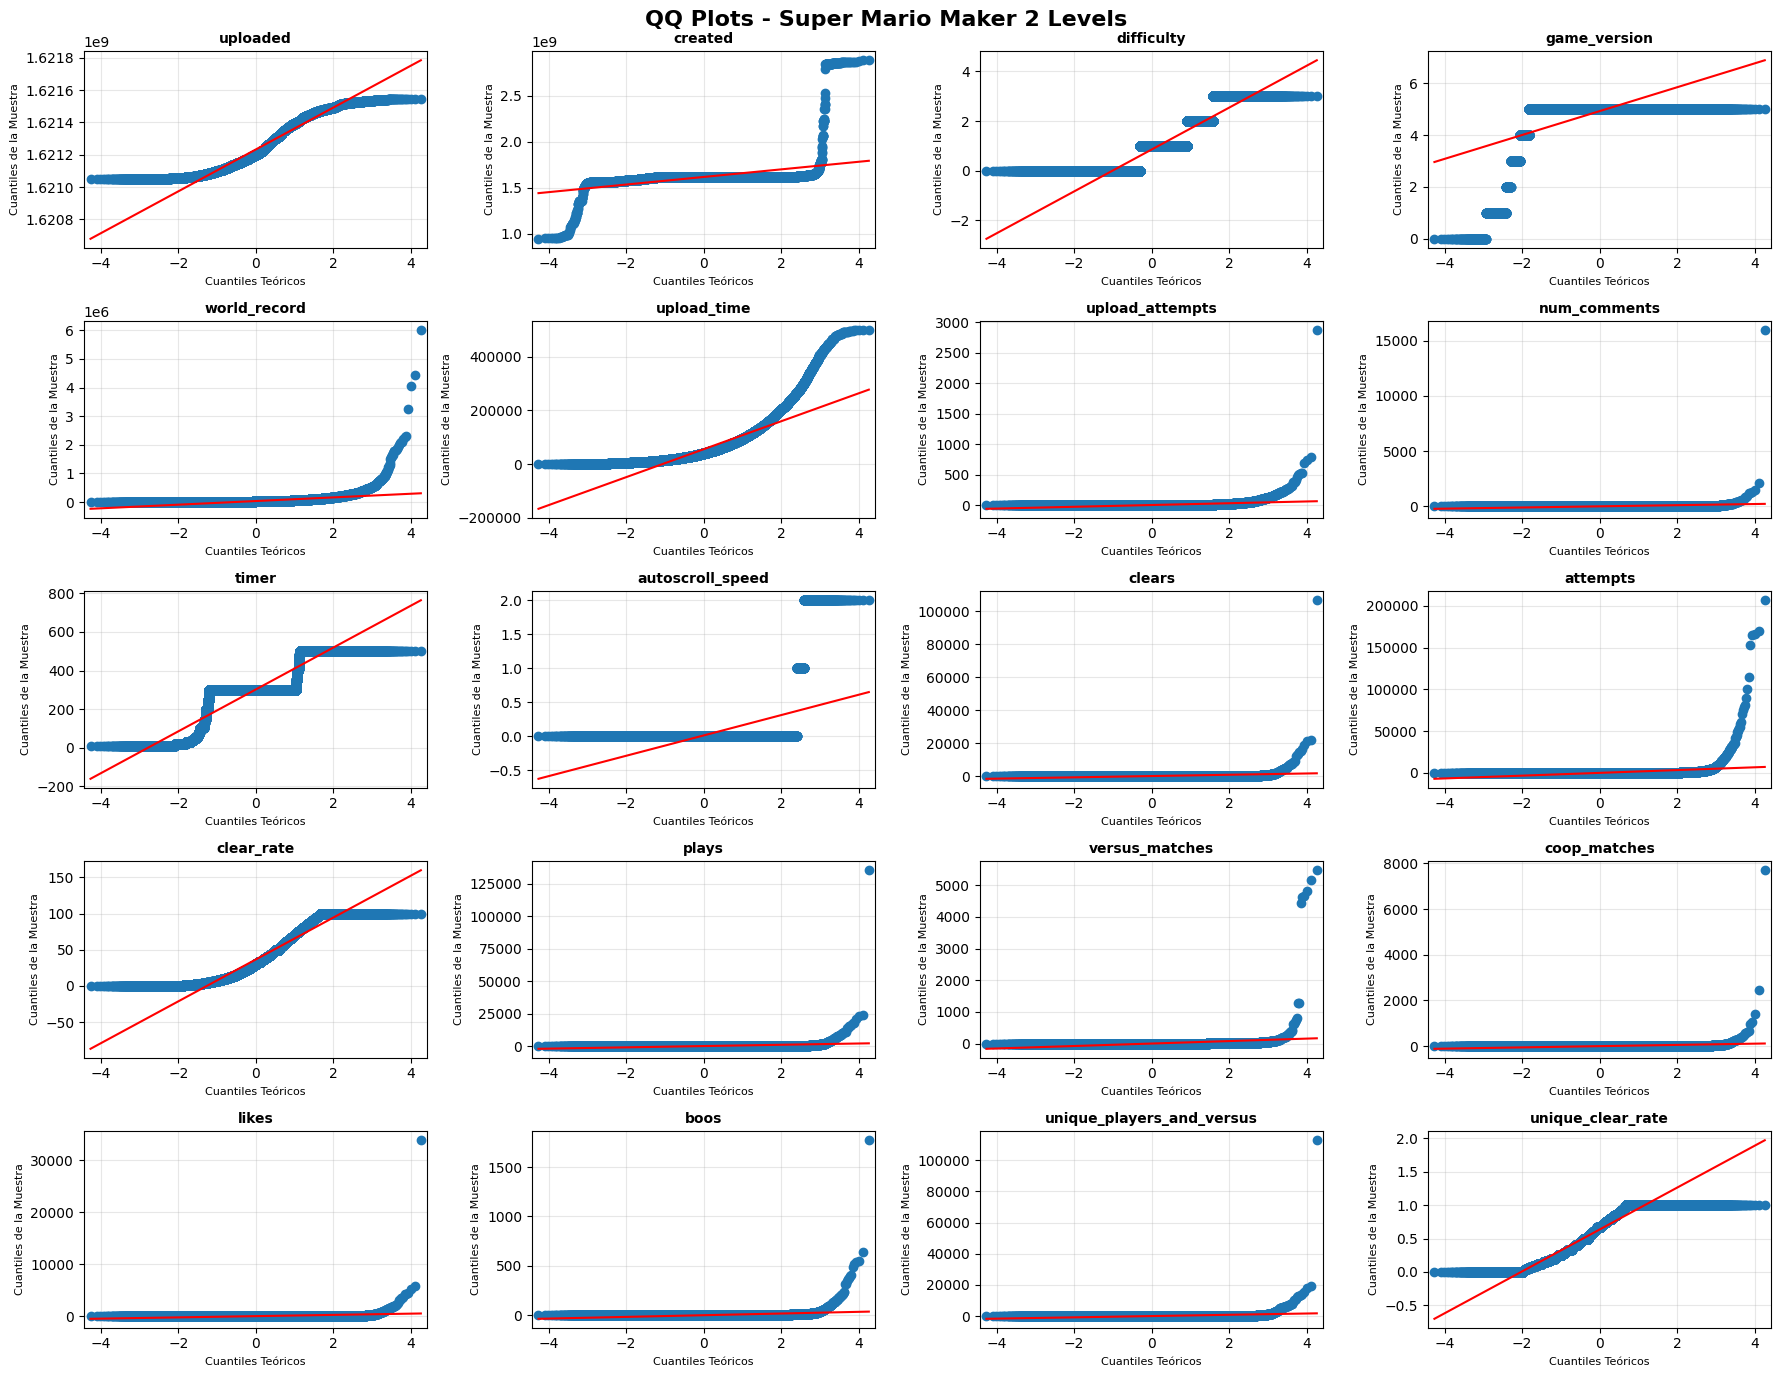

In [20]:
fig, axes = plt.subplots(5, 4, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(smm2_df_clean.columns):
    sm.qqplot(smm2_df_clean[col].dropna(), ax=axes[i], line='s')
    
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Cuantiles Teóricos', fontsize=8)
    axes[i].set_ylabel('Cuantiles de la Muestra', fontsize=8)
    axes[i].grid(True, alpha=0.3)
for j in range(i+1, 20):
    axes[j].axis('off')
plt.suptitle('QQ Plots - Super Mario Maker 2 Levels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./img/smm2_qqplots.png', dpi=300, bbox_inches='tight')
plt.show()

Los histogramas y qq-plots muestran que ninguna de las columnas tiene datos parametricos, ya que la mayoria tienen una gran cola a la izquierda, y unas pocas tienen cola a la derecha.

## Descripción de los datos

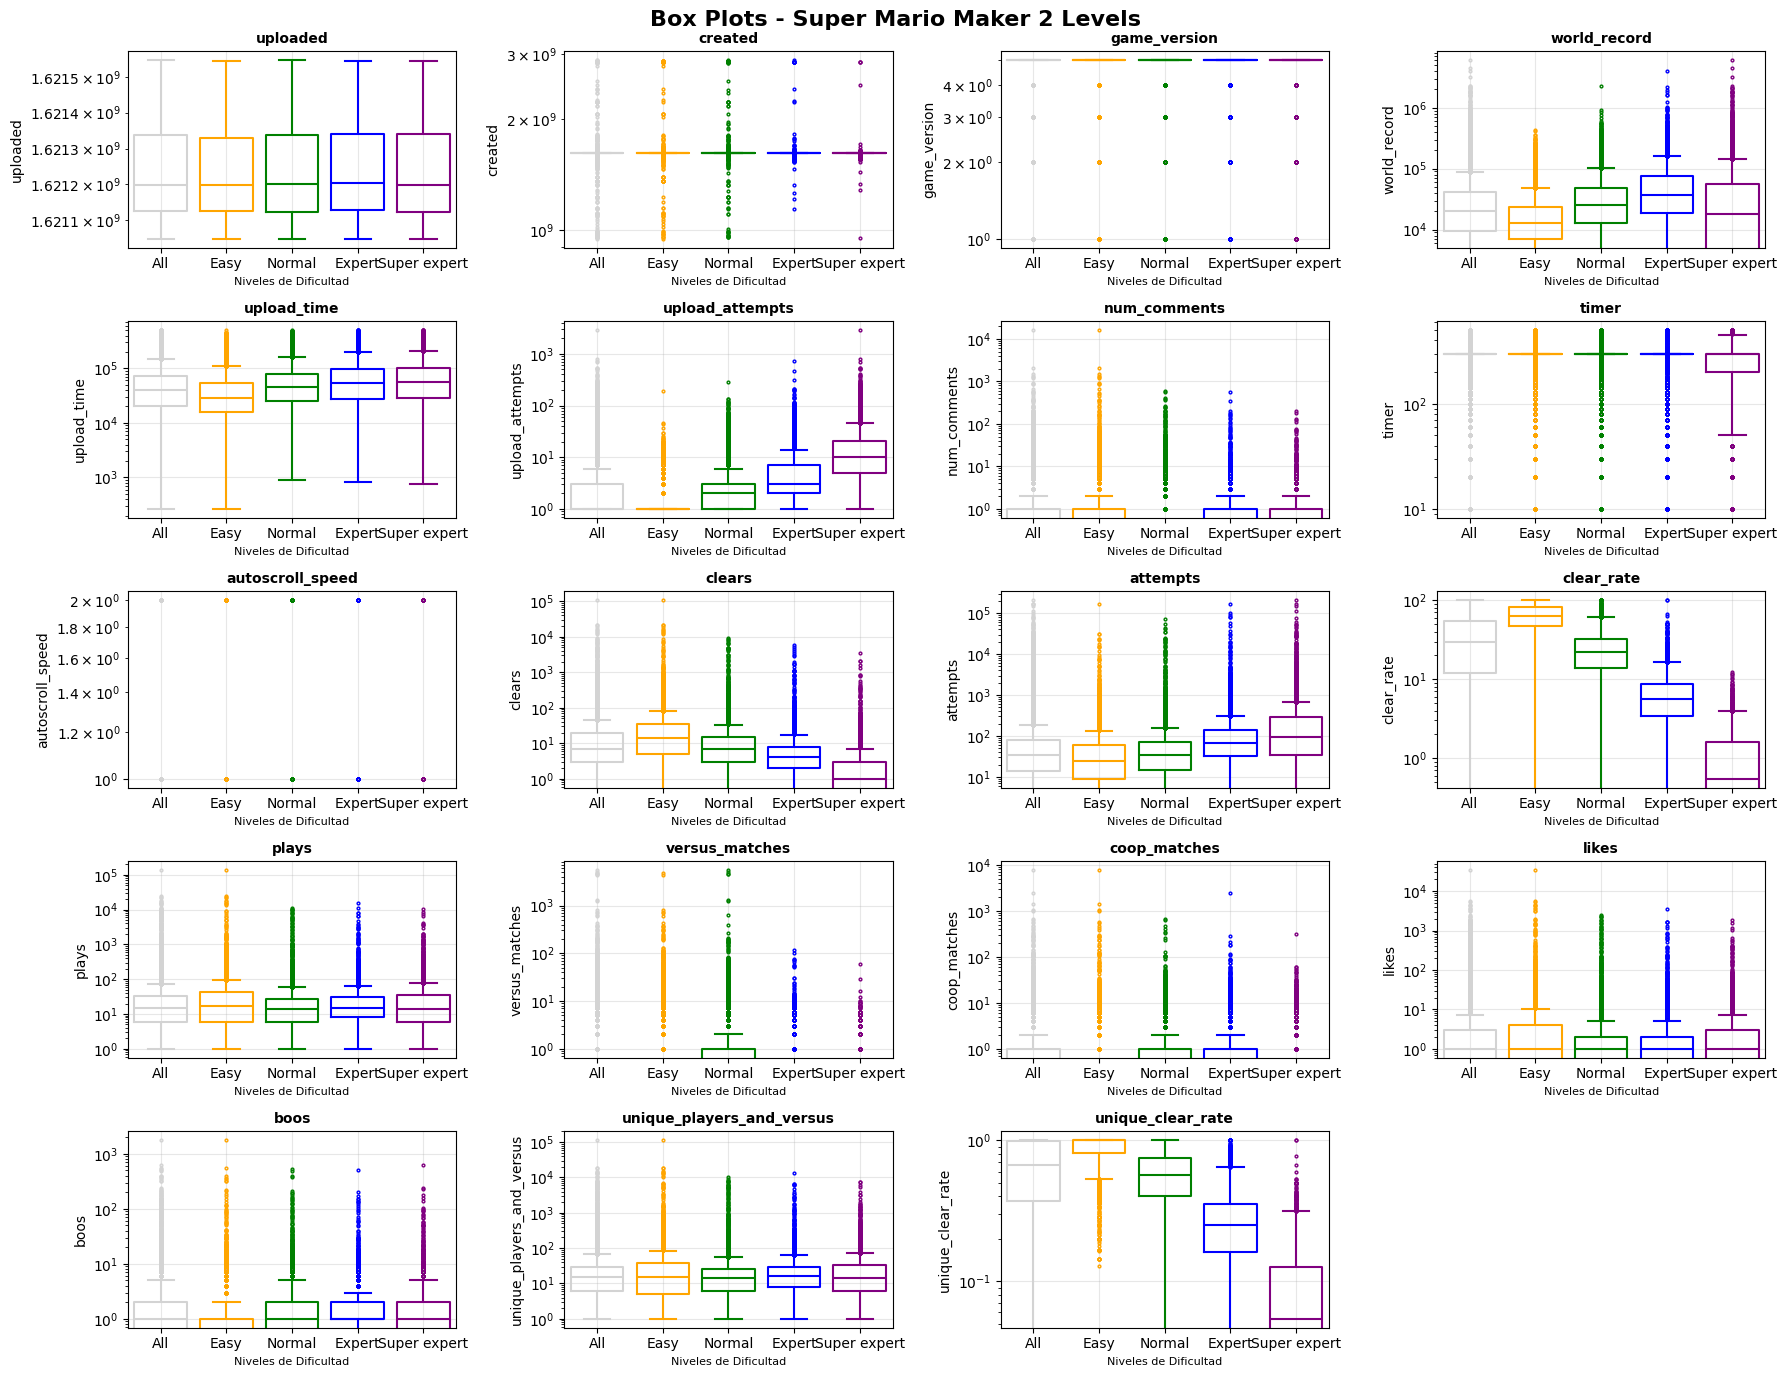

In [21]:
difficulty_names ={
    0: "Easy",
    1: "Normal",
    2: "Expert",
    3: "Super expert",
}
difficulty_order = ['All', 'Easy', 'Normal', 'Expert', 'Super expert']
difficulty_color = ['lightgray', 'blue', 'green', 'orange', 'purple']
skip_columns = ['difficulty']

fig, axes = plt.subplots(5, 4, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate([c for c in smm2_df_clean.columns if c not in skip_columns]):
    boxplot_df = smm2_df_clean[[col]].copy()
    boxplot_df['difficulty'] = 'All'
    for dif in smm2_df_clean['difficulty'].unique():
        boxplot_dif_df = smm2_df_clean[smm2_df_clean['difficulty'] == dif][[col]].copy()
        boxplot_dif_df['difficulty'] = difficulty_names[dif]
        boxplot_df = pd.concat([boxplot_df, boxplot_dif_df])

    sns.boxplot(x='difficulty', y=col, hue='difficulty', palette=difficulty_color, data=boxplot_df, order=difficulty_order, fliersize=2, fill=False, ax=axes[i])
    axes[i].legend([], [], frameon=False)
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Niveles de Dificultad', fontsize=8)
    axes[i].set_yscale('log')
    axes[i].grid(True, alpha=0.3)
for j in range(i+1, 20):
    axes[j].axis('off')

plt.suptitle('Box Plots - Super Mario Maker 2 Levels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./img/smm2_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
stats_df = pd.DataFrame({
    'minimo': smm2_df_clean.min(),
    'maximo': smm2_df_clean.max(),
    'media': smm2_df_clean.mean(),
    'mediana': smm2_df_clean.median(),
    'moda': smm2_df_clean.mode().iloc[0],
    'desv_std': smm2_df_clean.std(),
    'Q1': smm2_df_clean.quantile(0.25),
    'Q3': smm2_df_clean.quantile(0.75),
})
stats_df

minimo        maximo         media  \
uploaded                   1.621049e+09  1.621109e+09  1.621074e+09   
created                    1.039797e+09  2.868489e+09  1.618843e+09   
difficulty                 0.000000e+00  3.000000e+00  8.788000e-01   
game_version               0.000000e+00  5.000000e+00  4.917800e+00   
world_record              -1.000000e+00  1.835882e+06  3.371140e+04   
upload_time                4.330000e+02  4.995900e+05  5.278948e+04   
upload_attempts            1.000000e+00  2.170000e+02  3.894600e+00   
num_comments               0.000000e+00  8.720000e+02  1.061500e+00   
timer                      1.000000e+01  5.000000e+02  2.949610e+02   
autoscroll_speed           0.000000e+00  2.000000e+00  1.100000e-02   
clears                     0.000000e+00  1.348000e+04  2.315140e+01   
attempts                   0.000000e+00  1.667690e+05  1.315368e+02   
clear_rate                 0.000000e+00  1.000000e+02  3.613617e+01   
plays                      1.000000e+00  1.413500e+04  3.564700e+01   
versus_matches             0.000000e+00  5.148000e+03  1.750700e+00   
coop_matches               0.000000e+00  2.970000e+02  9.953000e-01   
likes                      0.000000e+00  3.126000e+03  4.551400e+00   
boos                       0.000000e+00  6.410000e+02  1.411500e+00   
unique_players_and_versus  1.000000e+00  1.093800e+04  3.268570e+01   
unique_clear_rate          0.000000e+00  1.000000e+00  6.288231e-01   

                                mediana          moda      desv_std  \
uploaded                   1.621073e+09  1.621084e+09  1.544585e+04   
created                    1.621076e+09  1.621097e+09  4.033546e+07   
difficulty                 1.000000e+00  1.000000e+00  8.624297e-01   
game_version               5.000000e+00  5.000000e+00  4.829767e-01   
world_record               1.907000e+04 -1.000000e+00  5.323579e+04   
upload_time                3.750250e+04  2.483000e+03  4.996805e+04   
upload_attempts            1.000000e+00  1.000000e+00  9.416770e+00   
num_comments               0.000000e+00  0.000000e+00  1.350896e+01   
timer                      3.000000e+02  3.000000e+02  1.138161e+02   
autoscroll_speed           0.000000e+00  0.000000e+00  1.381337e-01   
clears                     7.000000e+00  2.000000e+00  2.241808e+02   
attempts                   3.500000e+01  5.000000e+00  2.034905e+03   
clear_rate                 2.956146e+01  1.000000e+02  2.916452e+01   
plays                      1.400000e+01  5.000000e+00  2.799840e+02   
versus_matches             0.000000e+00  0.000000e+00  7.038990e+01   
coop_matches               0.000000e+00  0.000000e+00  7.180239e+00   
likes                      1.000000e+00  0.000000e+00  5.590185e+01   
boos                       1.000000e+00  0.000000e+00  1.045445e+01   
unique_players_and_versus  1.400000e+01  4.000000e+00  2.312079e+02   
unique_clear_rate          6.666667e-01  1.000000e+00  3.163585e-01   

                                     Q1            Q3  
uploaded                   1.621060e+09  1.621086e+09  
created                    1.620837e+09  1.621103e+09  
difficulty                 0.000000e+00  1.000000e+00  
game_version               5.000000e+00  5.000000e+00  
world_record               9.056250e+03  3.941575e+04  
upload_time                1.929500e+04  6.996050e+04  
upload_attempts            1.000000e+00  3.000000e+00  
num_comments               0.000000e+00  1.000000e+00  
timer                      3.000000e+02  3.000000e+02  
autoscroll_speed           0.000000e+00  0.000000e+00  
clears                     3.000000e+00  1.900000e+01  
attempts                   1.400000e+01  8.000000e+01  
clear_rate                 1.153846e+01  5.454545e+01  
plays                      6.000000e+00  3.100000e+01  
versus_matches             0.000000e+00  0.000000e+00  
coop_matches               0.000000e+00  1.000000e+00  
likes                      0.000000e+00  3.000000e+00  
boos                       0.000000e+00  

In [ ]:
latex_stats = stats_df[['minimo', 'Q1', 'mediana', 'Q3', 'maximo', 'media', 'desv_std']]
latex_stats.index = list(map(lambda c: f'\\texttt{{{c}}}', latex_stats.index))
print(latex_stats.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & minimo & Q1 & mediana & Q3 & maximo & media & desv_std \\
\midrule
\texttt{uploaded} & 1621048585.000000 & 1621060323.250000 & 1621072574.000000 & 1621085646.750000 & 1621108964.000000 & 1621073536.052400 & 15445.848509 \\
\texttt{created} & 1039796700.000000 & 1620836505.000000 & 1621075800.000000 & 1621103220.000000 & 2868488580.000000 & 1618842678.642000 & 40335462.936095 \\
\texttt{difficulty} & 0.000000 & 0.000000 & 1.000000 & 1.000000 & 3.000000 & 0.878800 & 0.862430 \\
\texttt{game_version} & 0.000000 & 5.000000 & 5.000000 & 5.000000 & 5.000000 & 4.917800 & 0.482977 \\
\texttt{world_record} & -1.000000 & 9056.250000 & 19070.000000 & 39415.750000 & 1835882.000000 & 33711.396300 & 53235.787054 \\
\texttt{upload_time} & 433.000000 & 19295.000000 & 37502.500000 & 69960.500000 & 499590.000000 & 52789.483700 & 49968.051316 \\
\texttt{upload_attempts} & 1.000000 & 1.000000 & 1.000000 & 3.000000 & 217.000000 & 3.894600 & 9.416770 \\
\texttt{num_comm

## Correlación en los datos

In [23]:
corr = smm2_df_clean.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

<Figure size 640x480 with 0 Axes>

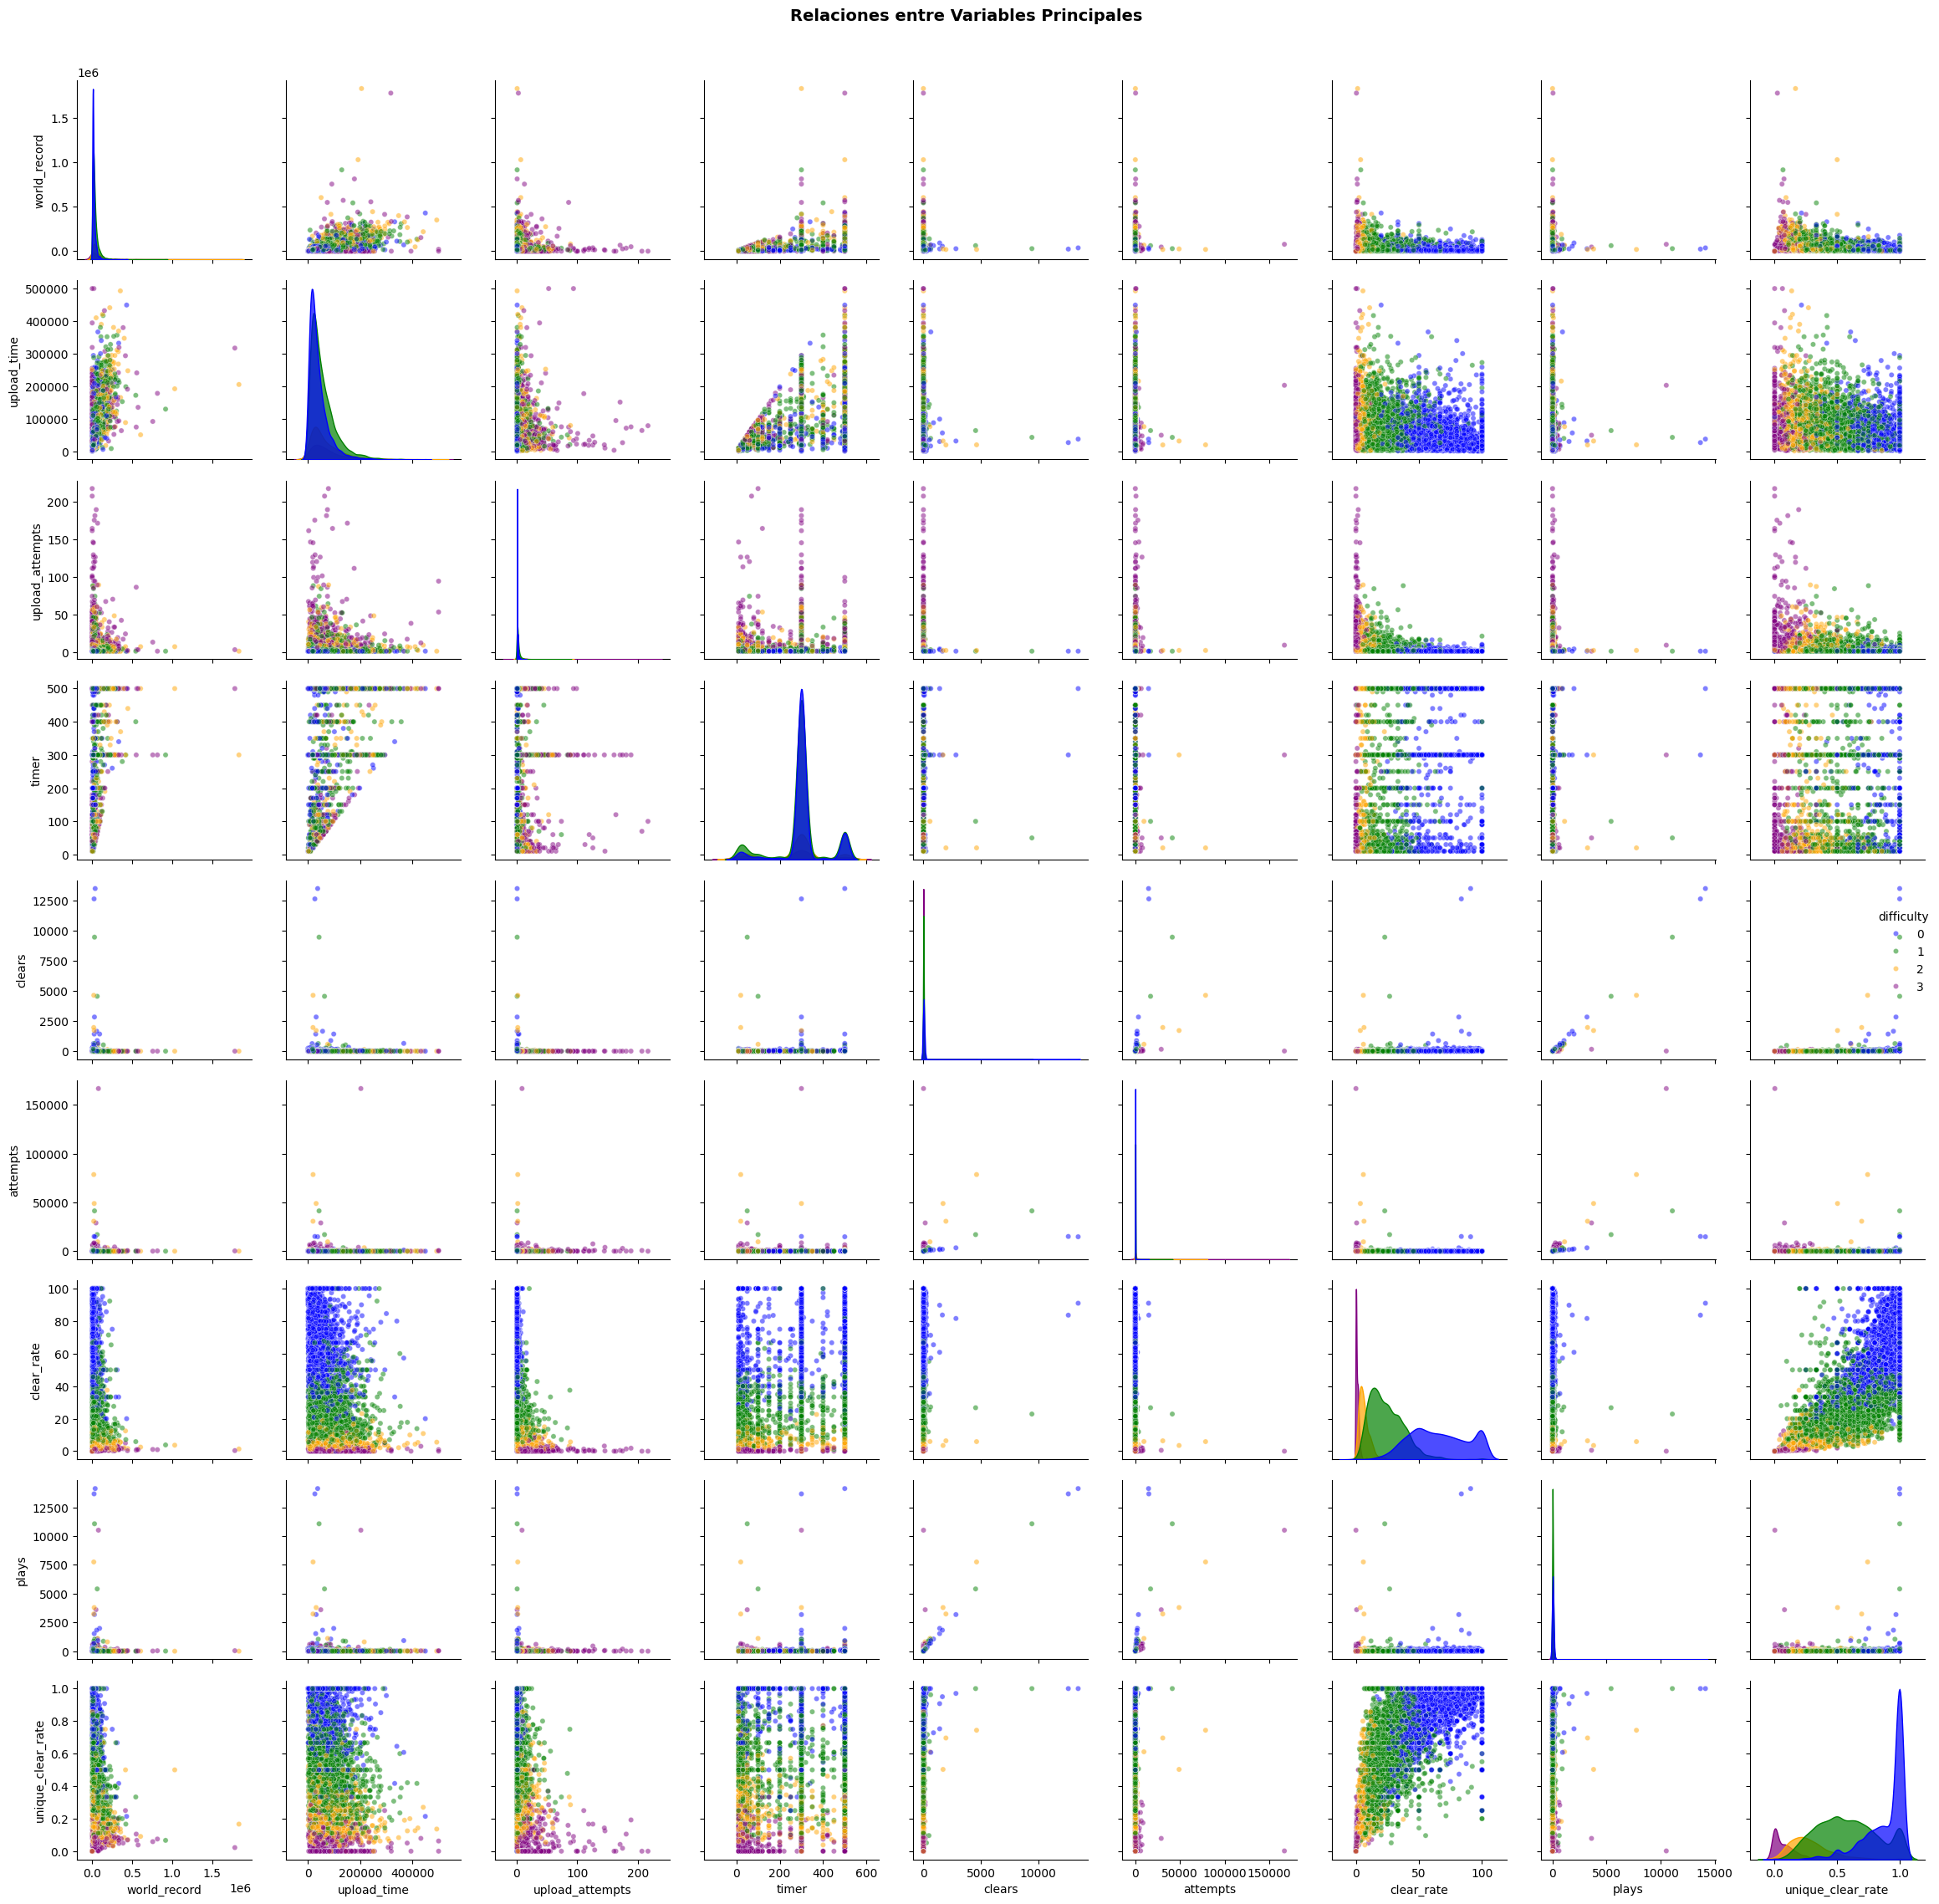

In [24]:
difficulty_color = ['blue', 'green', 'orange', 'purple']
important_columns = ['difficulty', 'world_record', 'upload_time', 'upload_attempts', 'timer', 'clears', 'attempts', 'clear_rate', 'plays', 'unique_clear_rate']

plt.figure()
sns.pairplot(smm2_df_clean.head(10_000)[important_columns], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 20},
             diag_kws={'alpha': 0.7},
             hue='difficulty',
             palette=difficulty_color)
plt.suptitle('Relaciones entre Variables Principales', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('./img/smm2_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

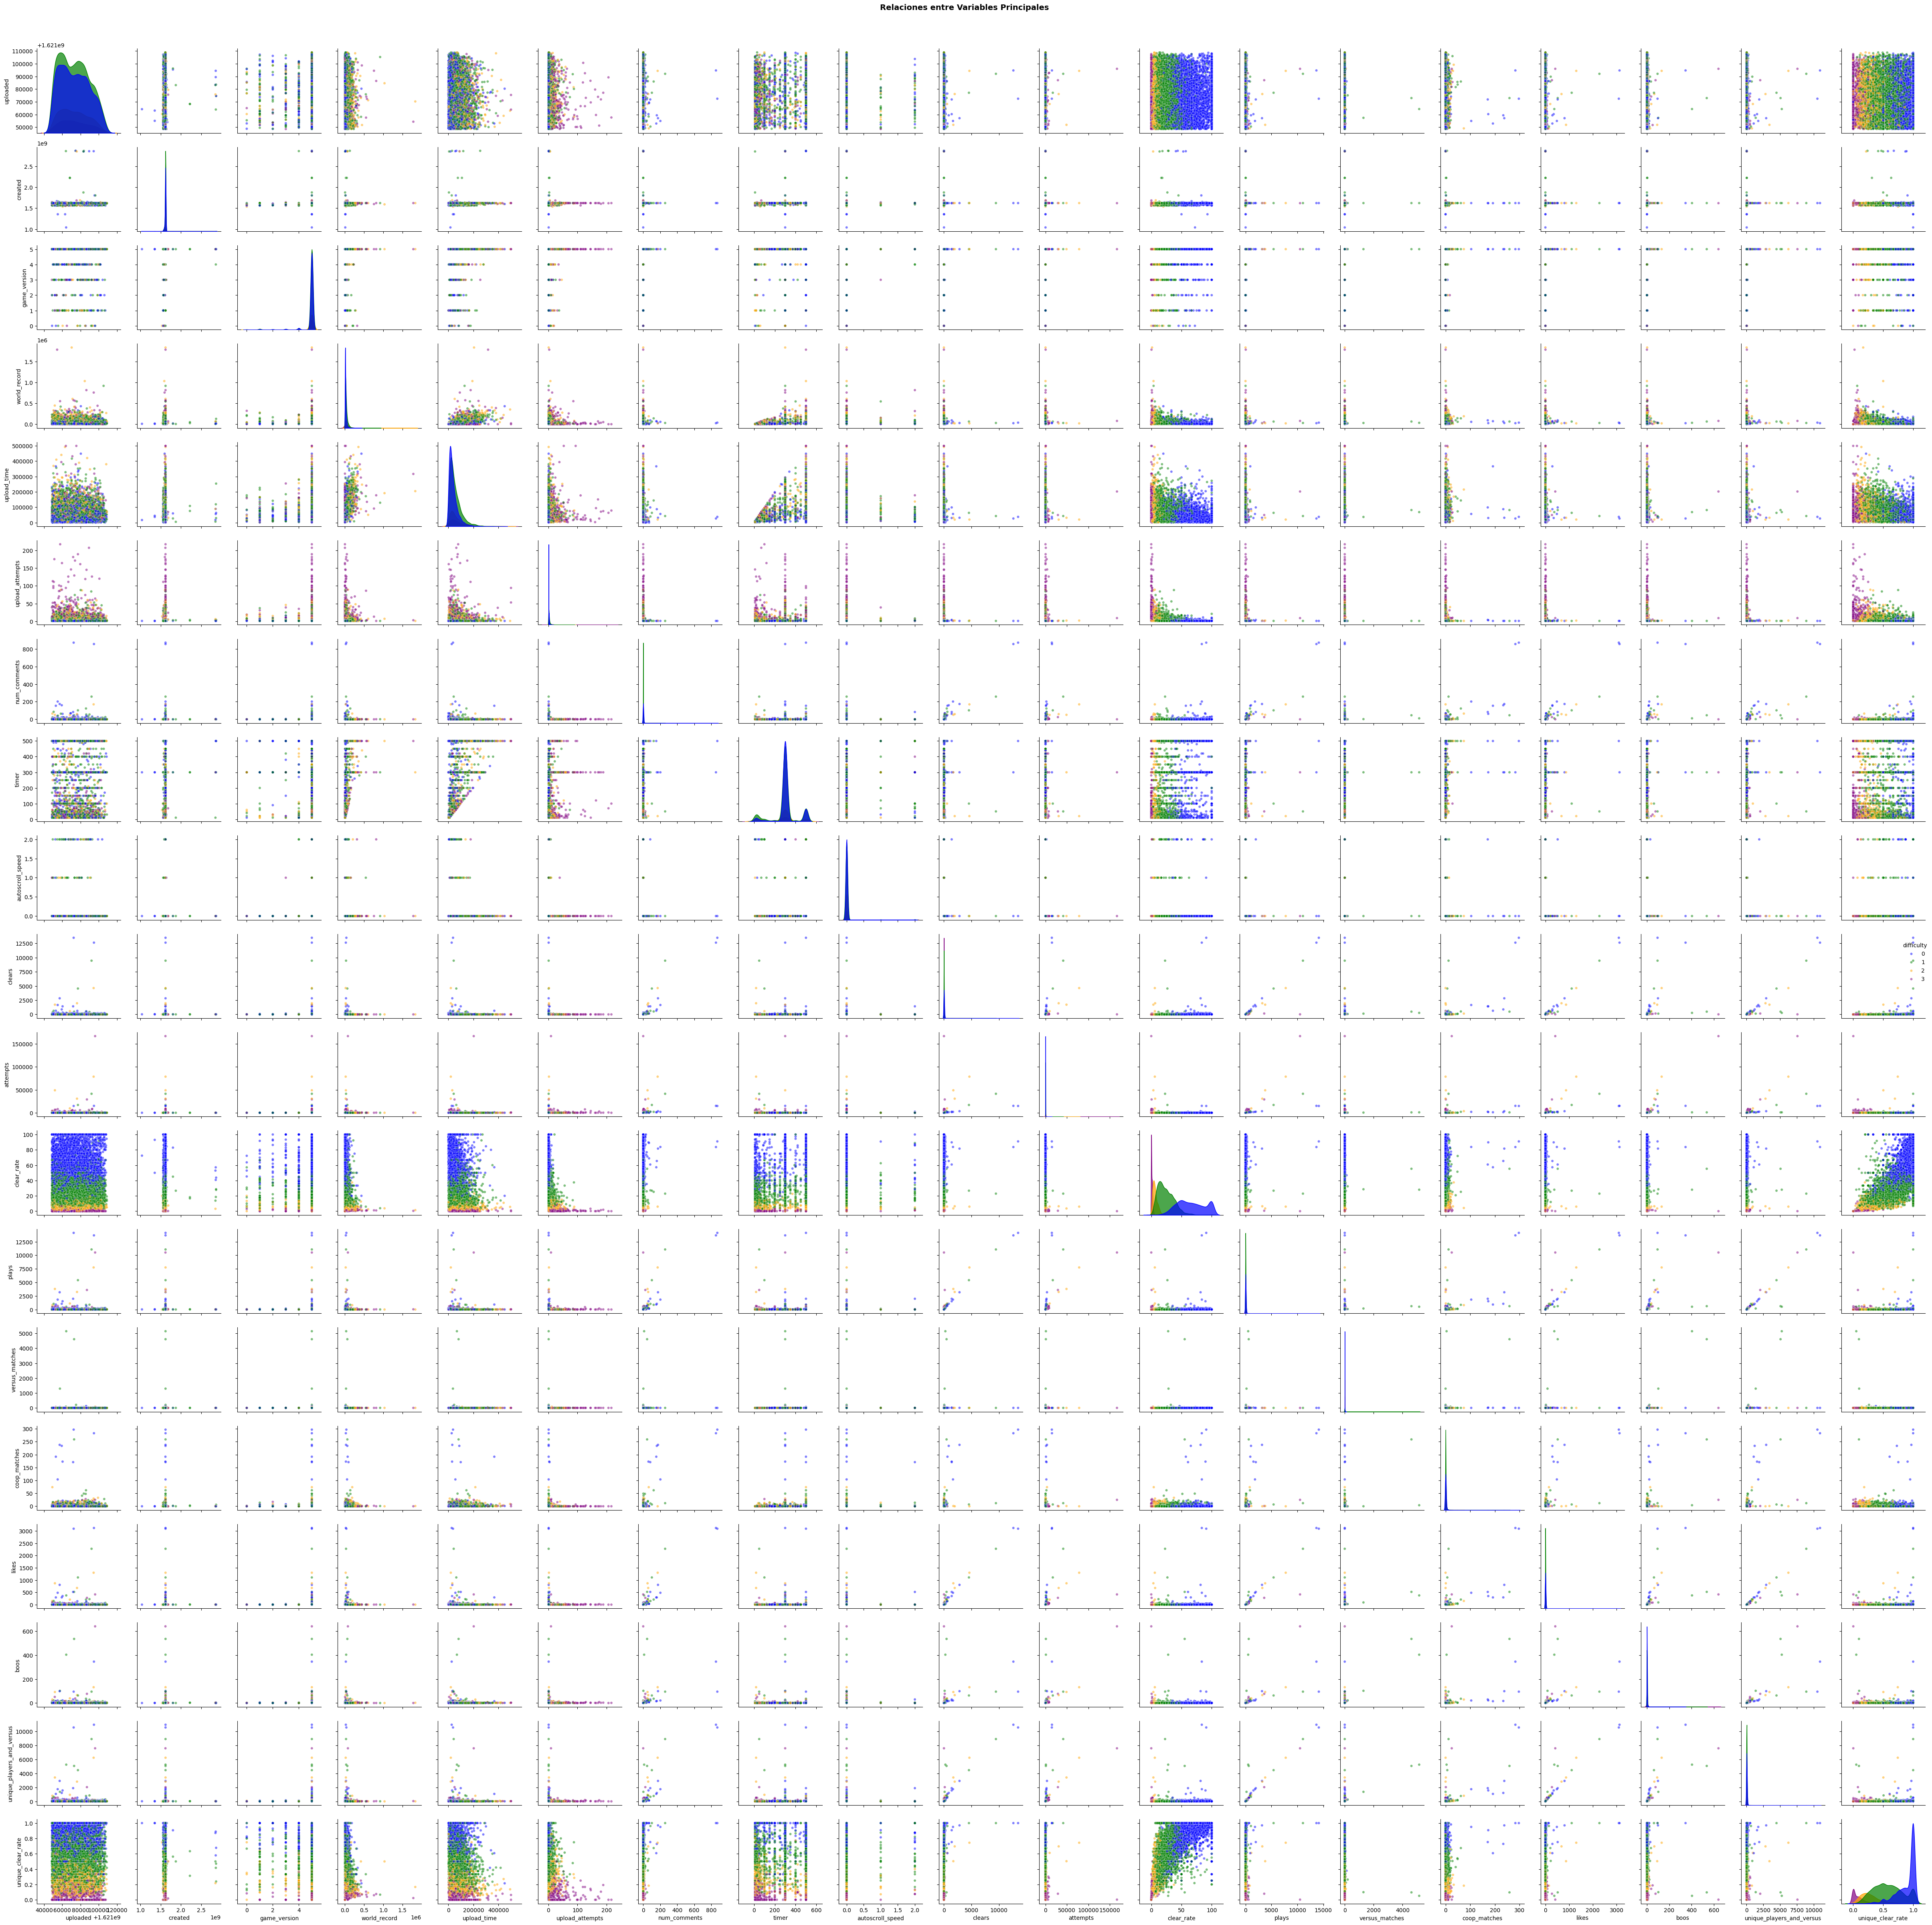

In [25]:
difficulty_color = ['blue', 'green', 'orange', 'purple']

plt.figure()
sns.pairplot(smm2_df_clean.head(10_000), 
             diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 20},
             diag_kws={'alpha': 0.7},
             hue='difficulty',
             palette=difficulty_color)
plt.suptitle('Relaciones entre Variables Principales', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('./img/smm2_pairplot_all.png', dpi=300, bbox_inches='tight')
plt.show()

## Hipotesis

In [26]:
from scipy.stats import pearsonr

Hay una correlación bastante alta entre clear_rate y mi variable creada unique_clear_rate, así que vamos a comprobar si existe una correlación entre estas 2.

h0: No hay correlación

h1: Si hay correlación

In [29]:
corr, p_value = pearsonr(smm2_df_clean.dropna()['clear_rate'], smm2_df_clean.dropna()['unique_clear_rate'])
print(f'Correlación: {corr}\nP-valor: {p_value}')

Correlación: 0.7672080867400868
P-valor: 0.0


El p-valor es menor a 0.05, por lo tanto se rechaza la hipotesis nula, y si existe una correlación entre clear_rate y unique_clear_rate.

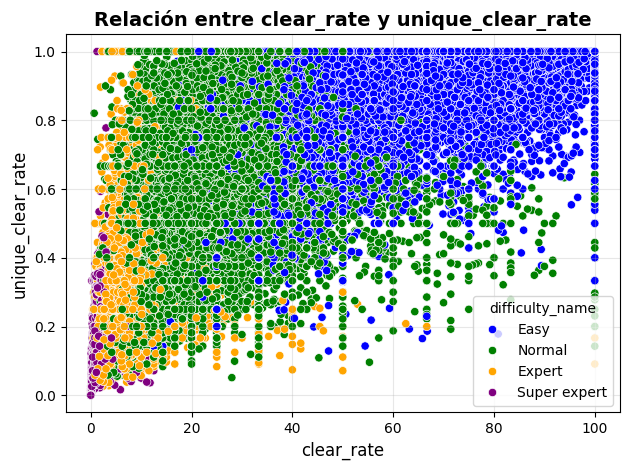

In [40]:
difficulty_names ={
    0: "Easy",
    1: "Normal",
    2: "Expert",
    3: "Super expert",
}
difficulty_order = ['Easy', 'Normal', 'Expert', 'Super expert']
difficulty_color = ['blue', 'green', 'orange', 'purple']

smm2_df_labeled = smm2_df_clean.copy()
smm2_df_labeled['difficulty_name'] = smm2_df_labeled['difficulty'].map(difficulty_names)

plt.figure()
sns.scatterplot(data=smm2_df_labeled, 
                x='clear_rate', 
                y='unique_clear_rate',
                hue='difficulty_name',
                hue_order=difficulty_order,
                palette=difficulty_color)
plt.title('Relación entre clear_rate y unique_clear_rate', fontsize=14, fontweight='bold')
plt.xlabel('clear_rate', fontsize=12)
plt.ylabel('unique_clear_rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()